## MLP-based Values prediction 

### 1. Install required dependency libraries

In [1]:
"""
Install required dependency libraries
-pip install pandas
-pip install scikit-learn
-pip install tensorflow
-import matplotlib.pyplot as plt

"""

'\nInstall required dependency libraries\n-pip install pandas\n-pip install scikit-learn\n-pip install tensorflow\n-import matplotlib.pyplot as plt\n\n'

### 2. Import installed required dependency libraries

In [96]:
# Import required libraries for LSTM model
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import font
from PIL import ImageTk, Image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 3. Prepare the datset

In [35]:
# Load the CSV file into a pandas dataframe
df = pd.read_csv("complete_data.csv")

In [36]:
#To see the whole inforamtion contenet of the above dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216683 entries, 0 to 216682
Data columns (total 94 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      216683 non-null  int64  
 1   open                       216683 non-null  float64
 2   high                       216683 non-null  float64
 3   close                      216683 non-null  float64
 4   low                        216683 non-null  float64
 5   timestamp                  216683 non-null  object 
 6   transactions               216683 non-null  int64  
 7   volume                     216683 non-null  float64
 8   volume_adi                 216683 non-null  float64
 9   volume_obv                 216683 non-null  float64
 10  volume_cmf                 216683 non-null  float64
 11  volume_fi                  216683 non-null  float64
 12  volume_em                  216683 non-null  float64
 13  volume_sma_em              21

In [37]:
# To see the first five data content of the above dataset:
df.head()

,index,open,high,close,low,timestamp,transactions,volume,volume_adi,volume_obv,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,0,0.00600,0.00678,0.00678,0.00600,2017-01-03T11:45:00,2,1000.000000,1000.0000,1000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006780,-98.572452,0.000000,0.000000
1,1,0.00720,0.00720,0.00720,0.00720,2017-01-09T12:00:00,1,712.857143,1000.0000,1712.857143,...,0.491906,0.098381,0.393525,-2.340378,-0.468076,-1.872302,0.006970,6.194690,6.010392,6.194690
2,2,0.00719,0.00739,0.00679,0.00669,2017-01-17T13:00:00,15,212273.631800,-150624.0227,-210560.774600,...,0.391593,0.157024,0.234569,101.237792,19.873098,81.364694,0.006889,-5.694444,-5.863008,0.147493
3,3,0.00679,0.00679,0.00677,0.00674,2017-01-17T13:15:00,11,209502.720700,-108723.4786,-420063.495300,...,0.285142,0.182647,0.102495,95.842665,35.067011,60.775653,0.006835,-0.294551,-0.294985,-0.147493
4,4,0.00679,0.00697,0.00682,0.00671,2017-01-17T13:30:00,25,606204.113200,-201985.6498,186140.617900,...,0.256920,0.197502,0.059418,96.510223,47.355654,49.154569,0.006829,0.738552,0.735838,0.589971


In [38]:
# Drop the rows containing NaN values
df = df.dropna()

In [39]:
# Select the features for training
features = ["open", "high", "low", "close"]

In [40]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

In [41]:
# Define the input and output sequences
sequence_length = 10  # Length of the input sequence
X = []
y = []
for i in range(sequence_length, len(df)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

In [42]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### 4. Define and build the LSTM-model

In [43]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(sequence_length, len(features))))
lstm_model.add(Dense(len(features)))

In [44]:
# Print-out the model summary
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                11000     
                                                                 
 dense_4 (Dense)             (None, 4)                 204       
                                                                 
Total params: 11,204
Trainable params: 11,204
Non-trainable params: 0
_________________________________________________________________


In [45]:
# compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [46]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

### 5. Train the LSTM-model

In [47]:
# train the LSTM model
#lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
5417/5417 [==============================] - 59s 10ms/step - loss: 1.6452e-04 - accuracy: 0.8488 - val_loss: 2.3677e-06 - val_accuracy: 0.9967
Epoch 2/10
5417/5417 [==============================] - 60s 11ms/step - loss: 2.5820e-05 - accuracy: 0.8742 - val_loss: 1.4400e-06 - val_accuracy: 0.9968
Epoch 3/10
5417/5417 [==============================] - 41s 8ms/step - loss: 2.3795e-05 - accuracy: 0.8779 - val_loss: 7.8470e-07 - val_accuracy: 0.9968
Epoch 4/10
5417/5417 [==============================] - 46s 9ms/step - loss: 2.2919e-05 - accuracy: 0.8869 - val_loss: 6.9649e-07 - val_accuracy: 0.9968
Epoch 5/10
5417/5417 [==============================] - 47s 9ms/step - loss: 2.2208e-05 - accuracy: 0.8896 - val_loss: 1.5811e-06 - val_accuracy: 0.9968
Epoch 6/10
5417/5417 [==============================] - 45s 8ms/step - loss: 2.2063e-05 - accuracy: 0.9018 - val_loss: 1.2407e-06 - val_accuracy: 0.9967
Epoch 7/10
5417/5417 [==============================] - 46s 8ms/step - loss: 2.1

### 6. Plot the training

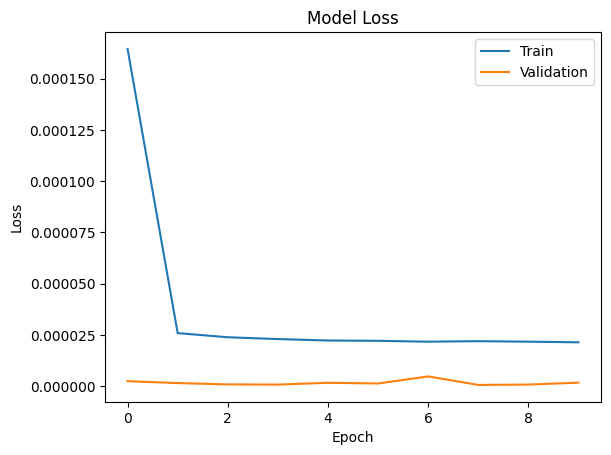

In [48]:
# plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

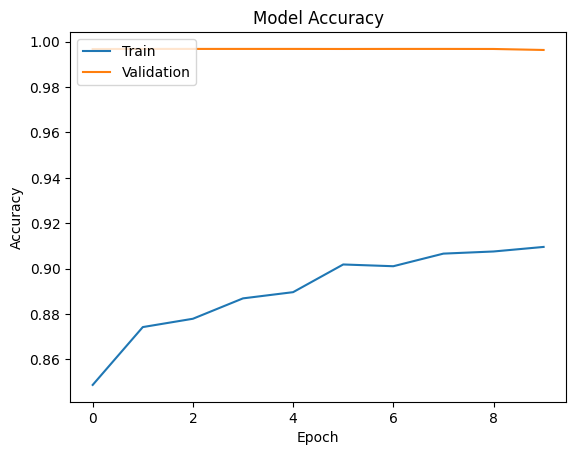

In [49]:
# plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### 7. Evaluate the trained model

In [50]:
# Make predictions
predictions = lstm_model.predict(X_test)

1355/1355 [==============================] - 6s 4ms/step


In [51]:
# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)

In [52]:
# Calculate evaluation metrics
mse = mean_squared_error(actual_values, predictions)
mae = mean_absolute_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)

In [53]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 1.9441976347805784e-05
Mean Absolute Error (MAE): 0.003653644563495405
R-squared: 0.9991596354406742


### 8. Save the model

In [59]:
# Save the model
lstm_model.save("lstm2_id10_model.h5")

### 9.Prediction

In [68]:
# Load the test dataset
test_data = pd.read_csv("test.csv")

# Select the features for prediction
features = ["open", "high", "low", "close"]

# Normalize the data using the same scaler from training
scaler = MinMaxScaler()
scaler.fit_transform(test_data[features])

# Prepare the input data for prediction
sequence_length = 10  # Length of the input sequence
X_test = test_data[features][-sequence_length:].values.reshape(1, sequence_length, len(features))

# Load the pre-trained model
model = load_model("lstm2_id10_model.h5")  # Replace "lstm2_id10_model.h5" with the path to your trained model file

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Print the predicted values for the last 15-minute timestamp
predicted_low = predictions[0][0]
predicted_high = predictions[0][1]
predicted_open = predictions[0][2]
predicted_close = predictions[0][3]
print(f"The predicted - Low price of the last 15 min: {predicted_low}")
print(f"The predicted - High price of the last 15 min: {predicted_high}")
print(f"The predicted - Open price of the last 15 min: {predicted_open}")
print(f"The predicted - Close price of the last 15 min: {predicted_close}")

1/1 [==============================] - 0s 282ms/step
The predicted - Low price of the last 15 min: 1.1062439680099487
The predicted - High price of the last 15 min: 1.1027032136917114
The predicted - Open price of the last 15 min: 1.1053898334503174
The predicted - Close price of the last 15 min: 1.113823413848877


### 10. Display prediction using GUI

In [99]:

# Load the test dataset
test_data = pd.read_csv("test.csv")

# Select the features for prediction
features = ["open", "high", "low", "close"]

# Normalize the data using the same scaler from training
scaler = MinMaxScaler()
scaler.fit_transform(test_data[features])

# Prepare the input data for prediction
sequence_length = 10  # Length of the input sequence
X_test = test_data[features][-sequence_length:].values.reshape(1, sequence_length, len(features))

# Load the pre-trained model
model = load_model("lstm2_id10_model.h5")  # Replace "lstm2_id10_model.h5" with the path to your trained model file

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)


# Create the main Tkinter window
window = tk.Tk()
window.title("Stock Prediction")

# Set the window size
window.geometry("400x200")

# Load the background image
bg_image = Image.open("background.jpg")  # Replace "background_image.jpg" with your image file
bg_image = bg_image.resize((400, 200), Image.LANCZOS)
bg_image = ImageTk.PhotoImage(bg_image)

# Create a label to hold the background image
bg_label = tk.Label(window, image=bg_image)
bg_label.place(x=0, y=0, relwidth=1, relheight=1)

# Set the font size
label_font = font.Font(size=16)

# Create labels to display the predicted values
low_label = tk.Label(window, text=f"The predicted - Low price of the last 15 min: {predictions[0][0]}")
low_label.pack()

line_label = tk.Label(window, text="-----------------------", font=label_font)
line_label.pack()

high_label = tk.Label(window, text=f"The predicted - High price of the last 15 min: {predictions[0][1]}")
high_label.pack()

line_label = tk.Label(window, text="-----------------------", font=label_font)
line_label.pack()

open_label = tk.Label(window, text=f"The predicted - Open price of the last 15 min: {predictions[0][2]}")
open_label.pack()

line_label = tk.Label(window, text="-----------------------", font=label_font)
line_label.pack()

close_label = tk.Label(window, text=f"The predicted - Close price of the last 15 min: {predictions[0][3]}")
close_label.pack()

line_label = tk.Label(window, text="****", font=label_font)
line_label.pack()

# Run the Tkinter event loop
window.mainloop()

1/1 [==============================] - 0s 231ms/step


In [109]:
# Load the test dataset
test_data = pd.read_csv("test.csv")

# Select the features for prediction
features = ["open", "high", "low", "close"]

# Normalize the data using the same scaler from training
scaler = MinMaxScaler()
scaler.fit_transform(test_data[features])

# Prepare the input data for prediction
sequence_length = 10  # Length of the input sequence
X_test = test_data[features][-sequence_length:].values.reshape(1, sequence_length, len(features))

# Load the pre-trained model
model = load_model("lstm2_id10_model.h5")  # Replace "lstm2_id10_model.h5" with the path to your trained model file

# Create the main Tkinter window
window = tk.Tk()
window.title("Stock Prediction")

# Set the window size
window.geometry("400x250")

# Load the background image
bg_image = Image.open("background.jpg")  # Replace "background_image.jpg" with your image file
bg_image = bg_image.resize((400, 250), Image.LANCZOS)
bg_image = ImageTk.PhotoImage(bg_image)

# Create a label to hold the background image
bg_label = tk.Label(window, image=bg_image)
bg_label.place(x=0, y=0, relwidth=1, relheight=1)

# Set the font size
label_font = font.Font(size=16)

# Create a label to display the predicted values
result_label = tk.Label(window, text="", font=label_font)
result_label.pack()

# Function to perform prediction
def perform_prediction():
    # Make predictions
    predictions = model.predict(X_test)

    # Inverse transform the predictions
    predictions = scaler.inverse_transform(predictions)

    # Update the result label with predicted values
    result_label.config(text=f"The predicted values are:\nLow: {predictions[0][0]}\n-----------------------\nHigh: {predictions[0][1]}\n-----------------------\nOpen: {predictions[0][2]}\n-----------------------\nClose: {predictions[0][3]}")

# Create a predict button
predict_button = tk.Button(window, text="Predict", command=perform_prediction)
predict_button.pack()

# Run the Tkinter event loop
window.mainloop()


1/1 [==============================] - 0s 28ms/step
